In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('disney_movies_total_gross.csv')
df['year'] = pd.DatetimeIndex(df['release_date']).year
df.sort_values(by=['inflation_adjusted_gross'], ascending=False, inplace=True)

## Q1

In [3]:
def answer_one():
    return df.head()

In [4]:
answer_one()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,year
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,1940
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985,1961
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515,1955


## Q2

In [5]:
def answer_two():
    top_10 = df.nlargest(10, 'inflation_adjusted_gross')
    top_10.plot(kind='bar', x='movie_title', y='inflation_adjusted_gross', log=True, figsize=(12,6), grid=True, color="#6f00ff")
    plt.title("Top 10 Movies with Inflation Adjusted Gross")
    plt.xlabel("Movie Title")
    plt.ylabel("Inflation Adjusted Gross")
    plt.show()

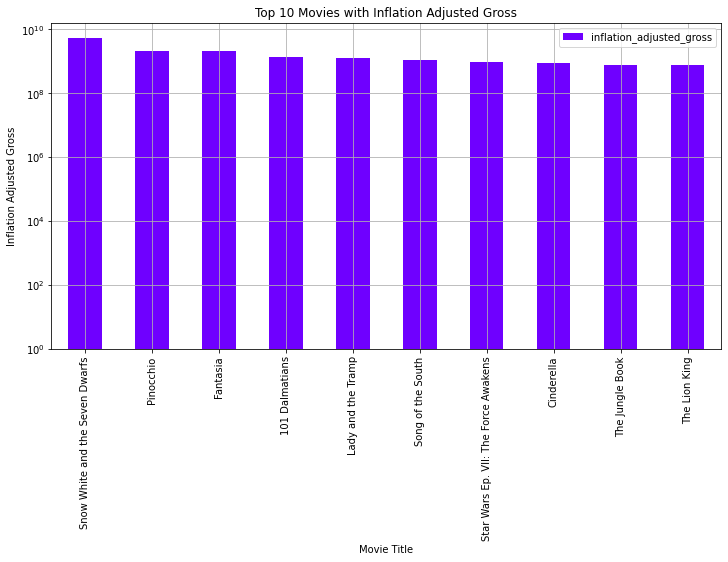

In [6]:
answer_two()

## Q3

In [7]:
def answer_three():
    group_df = df.groupby(['genre','year'])['inflation_adjusted_gross'].mean()
    return pd.DataFrame(group_df)

In [8]:
answer_three()

inflation_adjusted_gross
genre   year                          
Action  1981                       0.0
        1982                77184895.0
        1988                36053517.0
        1990               118358772.0
        1991                57918572.5
...                                ...
Western 1995                15983331.0
        2000                89042541.0
        2003                81547672.0
        2004                60878640.0
        2013                92597388.0

[218 rows x 1 columns]

## Q4

In [9]:
def answer_four():
    genre_means = answer_three()
    sns.lineplot(data=genre_means, x='year', y='inflation_adjusted_gross', hue='genre')
    sns.set(rc={'figure.figsize':(15,10)})
    plt.title('Movie Genre Trend')

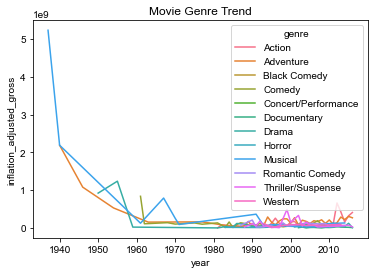

In [10]:
answer_four()

## Q5

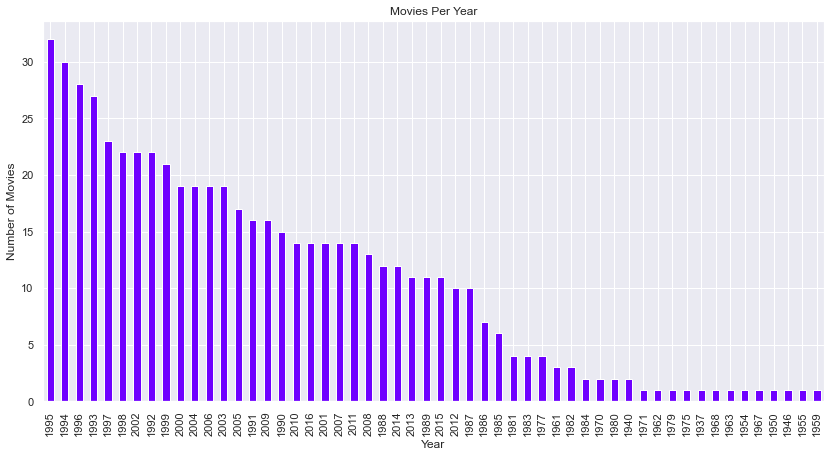

In [11]:
df['year'].value_counts().plot(kind='bar', figsize=(14,7), grid=True, color="#6f00ff")
plt.title("Movies Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()

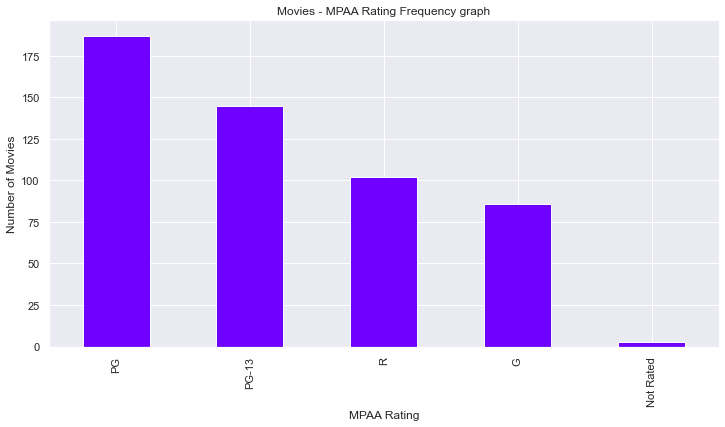

In [12]:
df['mpaa_rating'].value_counts().plot(kind='bar', figsize=(12,6), grid=True, color="#6f00ff")
plt.title("Movies - MPAA Rating Frequency graph")
plt.xlabel("MPAA Rating")
plt.ylabel("Number of Movies")
plt.show()

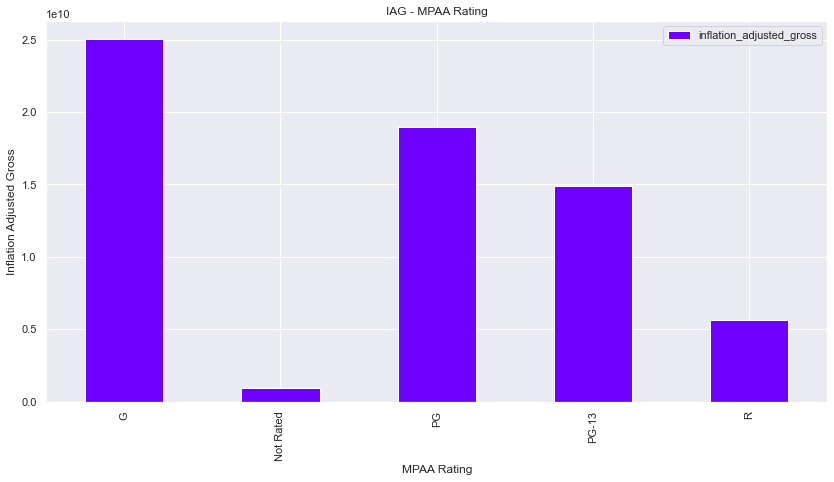

In [13]:
rating_adj_gross = pd.DataFrame(df.groupby(['mpaa_rating'])['inflation_adjusted_gross'].sum())
rating_adj_gross.plot(kind='bar', figsize=(14,7), grid=True, color="#6f00ff")
plt.title("IAG - MPAA Rating")
plt.xlabel("MPAA Rating")
plt.ylabel("Inflation Adjusted Gross")
plt.show()

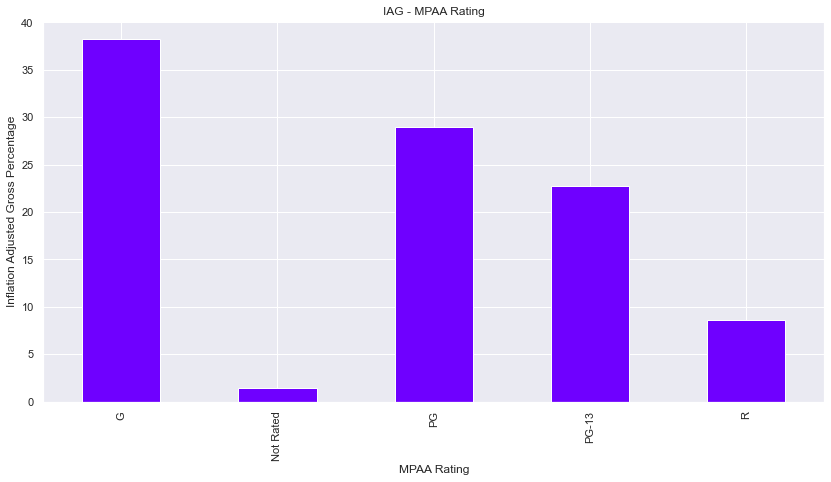

In [14]:
sum_all_values = rating_adj_gross[['inflation_adjusted_gross']].sum().iloc[0]
rating_adj_gross['inf_adj_gross_percentage'] = (rating_adj_gross['inflation_adjusted_gross'] / sum_all_values) * 100
rating_adj_gross['inf_adj_gross_percentage'].plot(kind='bar', figsize=(14,7), grid=True, color="#6f00ff")
plt.title("IAG - MPAA Rating")
plt.xlabel("MPAA Rating")
plt.ylabel("Inflation Adjusted Gross Percentage")
plt.show()

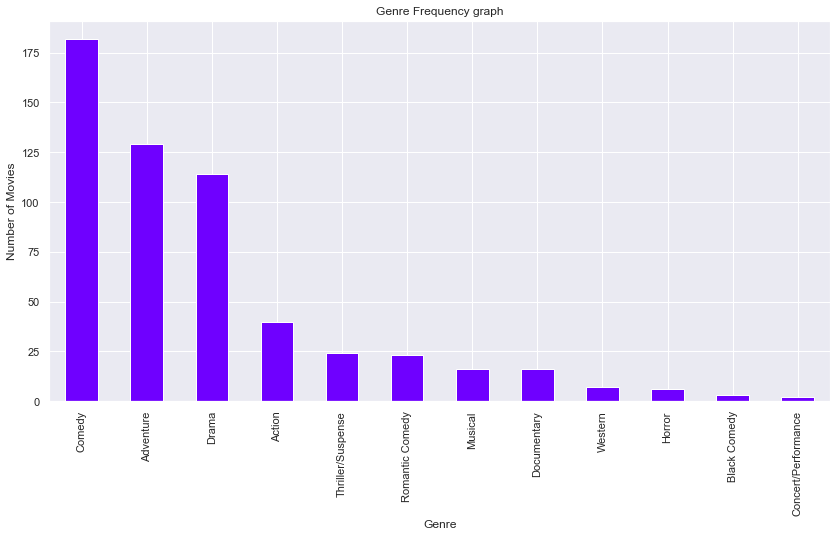

In [15]:
df['genre'].value_counts().plot(kind='bar', figsize=(14,7), grid=True, color="#6f00ff")
plt.title("Genre Frequency graph")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.show()

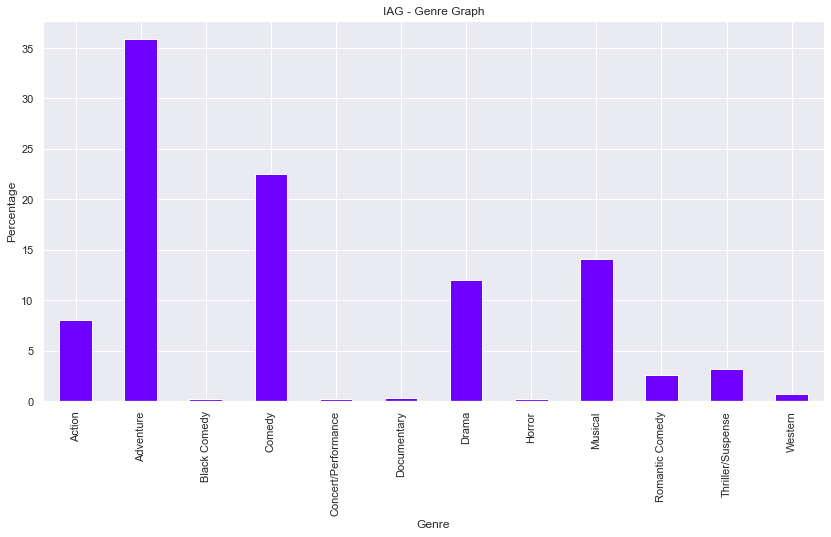

In [16]:
genre_group_df = pd.DataFrame(df.groupby(['genre'])['inflation_adjusted_gross'].sum())
sum_all_values = genre_group_df[['inflation_adjusted_gross']].sum().iloc[0]
genre_group_df['genre_iag_percentage'] = (genre_group_df['inflation_adjusted_gross'] / sum_all_values) * 100
genre_group_df['genre_iag_percentage'].plot(kind='bar', figsize=(14,7), grid=True, color="#6f00ff")
plt.title("IAG - Genre Graph")
plt.xlabel("Genre")
plt.ylabel("Percentage")
plt.show()